In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [329]:
# reading the dataset
train = pd.read_csv("train.csv")

In [330]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [331]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [332]:
train_new = train.drop(['PoolQC','MiscFeature','Alley','Fence','Utilities'],axis=1)
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non

In [333]:
train_new = train_new[train_new.isnull().sum(axis=1) <2]
train_with_removedColumns= train_new[train_new.isnull().sum(axis=1) <1]

In [334]:
train_with_removedColumns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 1457
Data columns (total 76 columns):
Id               583 non-null int64
MSSubClass       583 non-null int64
MSZoning         583 non-null object
LotFrontage      583 non-null float64
LotArea          583 non-null int64
Street           583 non-null object
LotShape         583 non-null object
LandContour      583 non-null object
LotConfig        583 non-null object
LandSlope        583 non-null object
Neighborhood     583 non-null object
Condition1       583 non-null object
Condition2       583 non-null object
BldgType         583 non-null object
HouseStyle       583 non-null object
OverallQual      583 non-null int64
OverallCond      583 non-null int64
YearBuilt        583 non-null int64
YearRemodAdd     583 non-null int64
RoofStyle        583 non-null object
RoofMatl         583 non-null object
Exterior1st      583 non-null object
Exterior2nd      583 non-null object
MasVnrType       583 non-null object
MasVnrArea  

In [335]:
train_with_removedColumns.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.030090,-0.017709,-0.055275,-0.071510,0.021380,-0.039086,-0.022238,-0.126854,-0.037984,...,-0.060695,-0.005887,0.000092,-0.032634,0.020119,0.066897,0.098007,-0.013871,0.029525,-0.074858
MSSubClass,-0.030090,1.000000,-0.340014,-0.191226,-0.007630,0.026021,-0.039973,0.022593,-0.065979,-0.094975,...,0.054167,-0.074807,0.020328,-0.010460,0.000443,0.007164,-0.030794,-0.009648,-0.021919,-0.101487
LotFrontage,-0.017709,-0.340014,1.000000,0.360432,0.225842,-0.052438,0.095758,0.113346,0.226891,0.272186,...,-0.004300,0.186229,0.055821,0.061821,-0.007634,0.242820,-0.026369,-0.017081,0.015911,0.283097
LotArea,-0.055275,-0.191226,0.360432,1.000000,0.132980,-0.015169,-0.004438,0.007259,0.095574,0.239109,...,0.101638,0.092415,-0.017653,-0.007294,0.048548,0.102711,-0.006037,0.006199,0.004851,0.252301
OverallQual,-0.071510,-0.007630,0.225842,0.132980,1.000000,-0.248497,0.565501,0.580648,0.422300,0.267654,...,0.251110,0.287535,-0.131020,0.003331,-0.018170,0.071205,-0.075955,0.078426,0.015752,0.776329
OverallCond,0.021380,0.026021,-0.052438,-0.015169,-0.248497,1.000000,-0.536779,-0.082936,-0.204500,-0.101966,...,-0.083143,-0.044153,0.073711,-0.026489,0.080919,-0.029891,0.152742,-0.008077,0.060043,-0.151409
YearBuilt,-0.039086,-0.039973,0.095758,-0.004438,0.565501,-0.536779,1.000000,0.660190,0.349586,0.208327,...,0.240317,0.167070,-0.353669,0.019977,-0.117833,-0.010244,-0.100891,0.035754,0.013433,0.473073
YearRemodAdd,-0.022238,0.022593,0.113346,0.007259,0.580648,-0.082936,0.660190,1.000000,0.220005,0.131927,...,0.237201,0.198145,-0.222594,-0.016933,-0.076765,0.010491,-0.022061,0.040609,0.059925,0.519747
MasVnrArea,-0.126854,-0.065979,0.226891,0.095574,0.422300,-0.204500,0.349586,0.220005,1.000000,0.286157,...,0.172668,0.088464,-0.106176,0.038199,0.008063,0.004018,-0.051065,-0.033722,0.009843,0.481089
BsmtFinSF1,-0.037984,-0.094975,0.272186,0.239109,0.267654,-0.101966,0.208327,0.131927,0.286157,1.000000,...,0.199817,0.144220,-0.087019,0.034840,0.045128,0.216849,-0.018520,-0.046516,0.074062,0.380394


In [336]:
train_with_removedColumns.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Open

In [337]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
#alues= ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','Asymmetrique Activity Index','Asymmetrique Profile Index','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']
values= ['MSZoning', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1',  'BsmtFinType2',
          'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive','SaleType',
       'SaleCondition']
for column in values:
    train_with_removedColumns[column] = le.fit_transform(train_with_removedColumns[column])

In [338]:
train_with_removedColumns.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,2,80.0,9600,1,3,3,2,0,...,0,0,0,0,0,5,2007,7,3,181500
2,3,60,2,68.0,11250,1,0,3,4,0,...,0,0,0,0,0,9,2008,7,3,223500
3,4,70,2,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,7,0,140000
4,5,60,2,84.0,14260,1,0,3,2,0,...,0,0,0,0,0,12,2008,7,3,250000
6,7,20,2,75.0,10084,1,3,3,4,0,...,0,0,0,0,0,8,2007,7,3,307000


In [339]:
def calculateYearDifference(year):
    currentYear=2019
    return currentYear-year
train_with_removedColumns['YearBuilt'] =train_with_removedColumns['YearBuilt'].astype(int)
train_with_removedColumns['YearBuilt'] = train_with_removedColumns['YearBuilt'].apply(calculateYearDifference)
train_with_removedColumns['YearRemodAdd'] = train_with_removedColumns['YearRemodAdd'].astype(int)
train_with_removedColumns['YearRemodAdd'] = train_with_removedColumns['YearRemodAdd'].apply(calculateYearDifference)
train_with_removedColumns['GarageYrBlt'] = train_with_removedColumns['GarageYrBlt'].astype(int)
train_with_removedColumns['GarageYrBlt'] = train_with_removedColumns['GarageYrBlt'].apply(calculateYearDifference)
train_with_removedColumns['GarageYrBlt'] = train_with_removedColumns['YrSold'].astype(int)
train_with_removedColumns['GarageYrBlt'] = train_with_removedColumns['YrSold'].apply(calculateYearDifference)



In [340]:
train_with_removedColumns['YearBuilt']

1        43
2        18
3       104
4        19
6        15
8        88
9        80
11       14
13       13
20       14
21       89
22       17
23       43
25       12
27       12
28       62
33       60
34       14
35       15
37       65
40       54
41       60
45       14
46       16
51       85
53       38
54       64
55       55
58       13
62       13
       ... 
1393    114
1394     13
1395     14
1399     94
1400     90
1401     15
1402     13
1405     15
1409     33
1413     14
1414     96
1415     12
1420     51
1421     42
1426     25
1427     74
1428     79
1430     14
1433     19
1434     42
1435     57
1437     11
1439     40
1440     97
1442     11
1447     24
1451     11
1455     20
1456     41
1457     78
Name: YearBuilt, Length: 583, dtype: int64

In [341]:
train_with_removedColumns['YearRemodAdd']

1       43
2       17
3       49
4       19
6       14
8       69
9       69
11      13
13      12
20      13
21      69
22      17
23      43
25      12
27      11
28      22
33      60
34      14
35      14
37      29
40      54
41      60
45      14
46      16
51      69
53      32
54      64
55      55
58      13
62      13
        ..
1393    19
1394    13
1395    13
1399    29
1400    69
1401    15
1402    13
1405    14
1409    28
1413    13
1414    19
1415    12
1420    51
1421    42
1426    25
1427    69
1428    27
1430    14
1433    19
1434    42
1435    14
1437    11
1439    40
1440    25
1442    11
1447    23
1451    10
1455    19
1456    31
1457    13
Name: YearRemodAdd, Length: 583, dtype: int64

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
df_train, df_test = train_test_split(train_with_removedColumns, train_size = 0.7, test_size = 0.3, random_state = 100)



scaler = MinMaxScaler()
numericalVariables=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch' , 'ScreenPorch' ,'PoolArea','MiscVal','MoSold','SalePrice','YrSold']
df_train[numericalVariables] = scaler.fit_transform(df_train[numericalVariables])
df_test[numericalVariables] = scaler.fit_transform(df_test[numericalVariables])
df_train.head()

y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test


In [343]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

ridge = Ridge()
rfe = RFE(ridge, 18)          
rfe = rfe.fit(X_train, y_train)

In [344]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [345]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 57),
 ('MSSubClass', True, 1),
 ('MSZoning', False, 34),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('Street', False, 2),
 ('LotShape', False, 52),
 ('LandContour', False, 40),
 ('LotConfig', False, 53),
 ('LandSlope', False, 14),
 ('Neighborhood', False, 50),
 ('Condition1', False, 29),
 ('Condition2', True, 1),
 ('BldgType', False, 55),
 ('HouseStyle', False, 44),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', False, 36),
 ('YearRemodAdd', False, 20),
 ('RoofStyle', False, 32),
 ('RoofMatl', False, 15),
 ('Exterior1st', False, 47),
 ('Exterior2nd', False, 48),
 ('MasVnrType', False, 6),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 30),
 ('Foundation', False, 31),
 ('BsmtQual', False, 4),
 ('BsmtCond', False, 25),
 ('BsmtExposure', False, 23),
 ('BsmtFinType1', False, 46),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 37),
 ('BsmtFinSF2', False, 11),
 ('BsmtUnfSF', False, 35),
 ('TotalBsmtSF', True, 1),
 ('H

In [346]:
col = X_train.columns[rfe.support_]
print(col)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Condition2', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtFinSF1', 'TotalBsmtSF',
       'Heating', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea'],
      dtype='object')


In [347]:
col2 = X_train.columns[~rfe.support_]
print(col)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Condition2', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtFinSF1', 'TotalBsmtSF',
       'Heating', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea'],
      dtype='object')


In [348]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [349]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005600,0.003198,0.002398,0.001958,0.0001,{'alpha': 0.0001},-0.040459,-0.034080,-0.039184,-0.039154,...,-0.040090,0.004358,16,-0.027854,-0.030698,-0.029514,-0.028341,-0.028025,-0.028887,0.001075
1,0.004739,0.005737,0.000000,0.000000,0.001,{'alpha': 0.001},-0.040441,-0.034077,-0.039175,-0.039147,...,-0.040083,0.004360,15,-0.027854,-0.030696,-0.029512,-0.028341,-0.028025,-0.028886,0.001074
2,0.006250,0.007654,0.000000,0.000000,0.01,{'alpha': 0.01},-0.040268,-0.034040,-0.039089,-0.039071,...,-0.040014,0.004383,14,-0.027854,-0.030683,-0.029488,-0.028333,-0.028022,-0.028876,0.001069
3,0.007602,0.005349,0.001601,0.001960,0.05,{'alpha': 0.05},-0.039577,-0.033881,-0.038710,-0.038752,...,-0.039724,0.004491,13,-0.027867,-0.030624,-0.029389,-0.028315,-0.028006,-0.028840,0.001039
4,0.003999,0.002529,0.000000,0.000000,0.1,{'alpha': 0.1},-0.038874,-0.033708,-0.038251,-0.038425,...,-0.039412,0.004621,11,-0.027900,-0.030566,-0.029294,-0.028319,-0.027987,-0.028813,0.001006


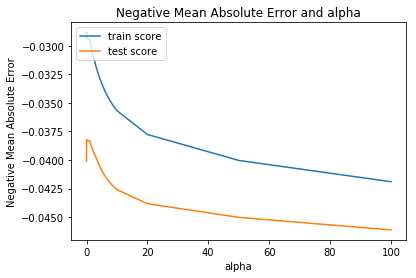

In [350]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [351]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-9.83319058e-06, -7.46645719e-03,  6.61500025e-03,  5.88577591e-03,
        6.96939218e-03,  1.81620006e-03, -1.91156888e-03,  6.78998314e-04,
       -9.39150443e-04, -2.53007887e-03,  1.50637016e-03, -4.28610296e-03,
       -4.18584552e-02, -5.02586762e-03, -2.40436163e-03,  3.71386756e-02,
        1.31929472e-02,  8.11722946e-04, -1.19924149e-02,  5.55615415e-03,
        2.31083282e-02, -4.22141248e-03,  3.09529730e-03, -3.06664591e-04,
        3.02175907e-02, -2.53500808e-02, -2.83842113e-03,  5.86174860e-03,
       -1.49403587e-02,  8.16324618e-03, -5.34867277e-03, -2.91332386e-03,
        3.69487870e-02, -1.82402770e-03,  2.57788345e-03, -5.32469087e-04,
        3.09791976e-02, -6.95493541e-03, -2.85790894e-03,  6.11370160e-03,
       -4.73492526e-03,  2.38042950e-02,  1.78923059e-02, -3.39845498e-03,
        2.39245226e-02,  7.86968402e-03, -1.60438276e-03,  1.68625994e-02,
        7.63059960e-03, -1.63646844e-02, -1.38653023e-02, -1.70822570e-02,
        1.58351989e-02,  

In [352]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [353]:
y_pred_ridge =ridge.predict(X_test)
print(y_pred_ridge)
#Printing the Score with RMLSE
print("\n\n Ridge SCORE : ", score(y_pred_ridge, y_test))

[0.31837196 0.4658238  0.1265276  0.16820725 0.2029719  0.25298604
 0.30209238 0.23095653 0.28063668 0.09075209 0.05159527 0.20454243
 0.21785187 0.21118218 0.23429134 0.36801076 0.37761968 0.10458397
 0.09941873 0.27362023 0.17765045 0.51897646 0.14828436 0.1584521
 0.31158236 0.17610058 0.23387147 0.18566635 0.12467689 0.14934606
 0.33689874 0.43301129 0.26184071 0.25449704 0.17346036 0.11758679
 0.34306878 0.16348576 0.38228422 0.35363396 0.3609058  0.30263659
 0.1806324  0.15774923 0.07833932 0.08497214 0.42137953 0.28629001
 0.40377275 0.09280485 0.42134224 0.06123494 0.22480765 0.24399675
 0.08425923 0.34449402 0.19545642 0.19714724 0.13811498 0.08489483
 0.35018181 0.11936644 0.34346041 0.1608093  0.22859226 0.21902205
 0.3892416  0.13878787 0.14048659 0.30799841 0.10150751 0.10810732
 0.28852003 0.27035117 0.07898745 0.29876749 0.12100943 0.30865804
 0.19003236 0.3035276  0.24221003 0.15903176 0.15042918 0.16446687
 0.50854271 0.2674403  0.21132443 0.05660632 0.14291237 0.15163

In [354]:
lasso = Lasso()
rfe = RFE(lasso, 18)          
rfe = rfe.fit(X_train, y_train)

In [355]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [356]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027992,1.042964e-02,0.000800,0.001600,0.0001,{'alpha': 0.0001},-0.037969,-0.032272,-0.036176,-0.037056,...,-0.038302,0.005269,1,-0.027973,-0.030498,-0.028952,-0.028492,-0.027841,-0.028751,0.000958
1,0.006399,3.199327e-03,0.001599,0.001959,0.001,{'alpha': 0.001},-0.040073,-0.035451,-0.039699,-0.038997,...,-0.040823,0.004846,2,-0.035005,-0.035985,-0.034170,-0.036478,-0.032761,-0.034880,0.001325
2,0.008797,1.599860e-03,0.000800,0.001599,0.01,{'alpha': 0.01},-0.047265,-0.048394,-0.051947,-0.052040,...,-0.049683,0.001950,3,-0.048003,-0.048447,-0.047164,-0.047038,-0.046408,-0.047412,0.000725
3,0.005599,1.959586e-03,0.002399,0.001959,0.05,{'alpha': 0.05},-0.068100,-0.067021,-0.081320,-0.082383,...,-0.072209,0.008114,4,-0.070410,-0.070023,-0.070427,-0.072722,-0.068895,-0.070495,0.001245
4,0.003999,4.623108e-07,0.002399,0.001959,0.1,{'alpha': 0.1},-0.094557,-0.087855,-0.102987,-0.105283,...,-0.093809,0.009898,5,-0.093579,-0.093432,-0.091379,-0.091124,-0.091732,-0.092249,0.001045


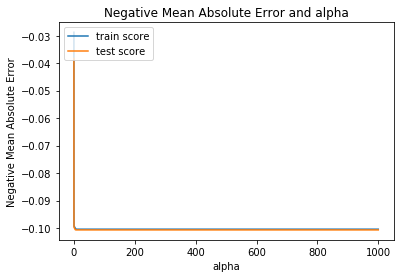

In [357]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [359]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-6.43680931e-06, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.10653275e-03,  0.00000000e+00,
       -4.15441554e-04, -0.00000000e+00,  1.21639392e-03, -2.10681348e-03,
       -9.90083519e-02, -5.37680047e-03, -0.00000000e+00,  9.94715382e-02,
        0.00000000e+00,  0.00000000e+00, -4.89126518e-03,  7.22739374e-04,
        1.87283521e-02, -4.33351206e-03,  3.44907589e-03,  0.00000000e+00,
        3.42056462e-02, -2.73508501e-02, -0.00000000e+00,  0.00000000e+00,
       -1.18634452e-02,  5.98072581e-03, -4.53862692e-03, -1.14084296e-03,
        6.80639539e-02, -6.87914093e-04,  0.00000000e+00,  0.00000000e+00,
        7.07211756e-02, -0.00000000e+00, -2.08859271e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  4.46303732e-05, -0.00000000e+00,
        5.08985954e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.58530052e-02,
        1.49065936e-02,  

In [362]:
# predict
from sklearn import metrics
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8357322362885464
0.6324833746306375


In [375]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7150286646381975
0.6027416939471046


In [366]:
alpha = 1
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.010254124359511785
-0.005948699476952646


at point 0.01 we have less difference in r2 score.